# Autoregresif Integrated Moving Average (ARIMA)

Model Autoregresif Integrated Moving Average (ARIMA) adalah model yang secara penuh mengabaikan independen variabel dalam membuat peramalan. ARIMA menggunakan nilai masa lalu dan sekarang dari variabel dependen untuk menghasilkan peramalan jangka pendek yang akurat. ARIMA cocok jika observasi dari deret waktu (time series) secara statistik berhubungan satu sama lain (dependent).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Membuat data contoh
date_rng = pd.date_range(start='1/1/2020', end='1/01/2024', freq='M')
data = np.random.randn(len(date_rng)) + np.linspace(0, 20, len(date_rng))
ts_data = pd.DataFrame(data, index=date_rng, columns=['value'])

/var/folders/tq/8dxrnbkd5bx737ykn8j5w4j40000gn/T/ipykernel_6976/514150715.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='1/1/2020', end='1/01/2024', freq='M')


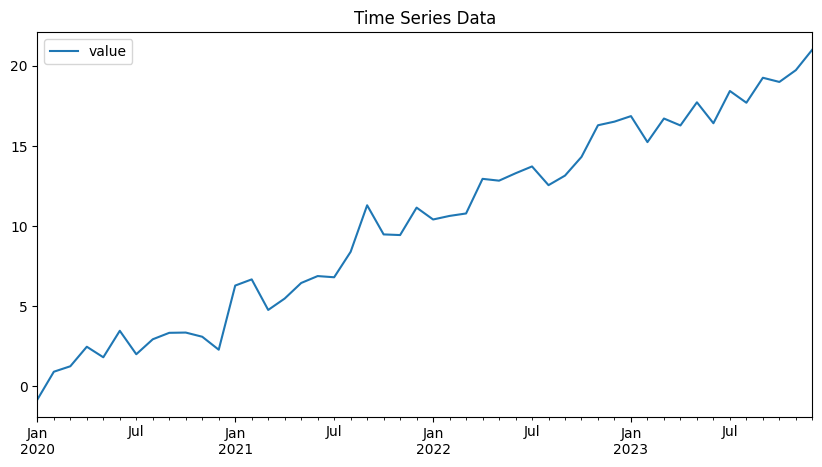

In [20]:
# Menampilkan data time series
ts_data.plot(figsize=(10, 5))
plt.title('Time Series Data')
plt.show()

In [21]:
# Membagi data menjadi training dan testing
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

In [22]:
# Menentukan parameter p, d, q untuk ARIMA
# p: order of autoregressive part
# d: degree of first differencing
# q: order of the moving average part
p = 2
d = 1
q = 2

In [23]:
# Membuat dan melatih model ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()



/Users/ariful/Library/CloudStorage/GoogleDrive-ariful.furqon@unej.ac.id/My Drive/Universitas Jember/Pendidikan/23242/Kecerdasan Buatan/Kecerdasan-Buatan-KTU1047/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
# Menampilkan ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   38
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -60.531
Date:                Tue, 28 May 2024   AIC                            131.063
Time:                        10:05:13   BIC                            139.117
Sample:                    01-31-2020   HQIC                           133.902
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2031      0.109     -1.864      0.062      -0.417       0.010
ar.L2         -0.9892      0.084    -11.768      0.000      -1.154      -0.824
ma.L1          0.1325      0.541      0.245      0.8

In [26]:
# Melakukan peramalan
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

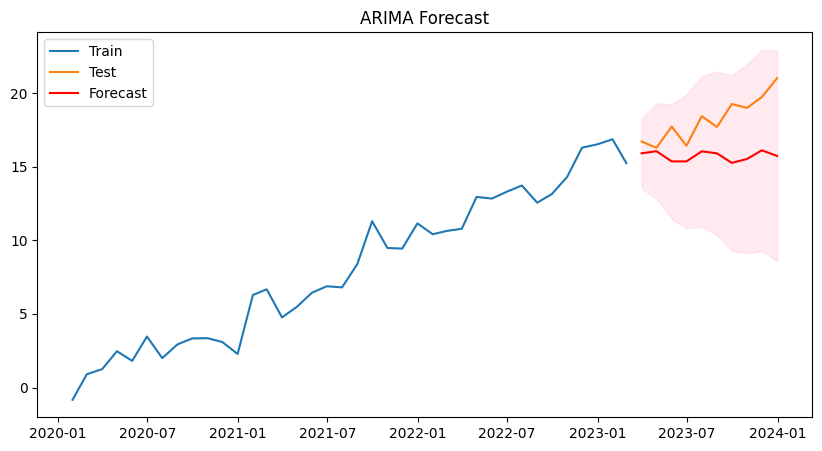

In [28]:
# Menampilkan hasil peramalan
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('ARIMA Forecast')
plt.show()